In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [4]:
plt.rc('legend', fontsize=10)

In [5]:
dt = 0.01
ms_to_index = lambda ms: int(ms / dt)
index_to_ms = lambda ind: ind * dt

In [6]:
dat_files = ['-5pA_with_square_pulse.dat', '-2.2pA_with_square_pulses.dat', '3pA.dat', '65pA.dat']

T = []
V = []
MKF = []
I = []

for f in dat_files:
    dat = np.genfromtxt(f).transpose()
    T.append(dat[0])
    V.append(dat[1])
    MKF.append(dat[3])
    I.append(dat[-1])

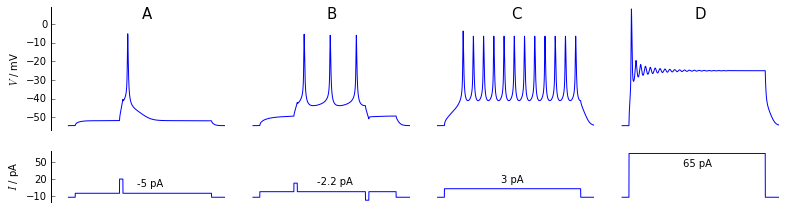

In [19]:
plt.rc('figure', figsize=(11, 3))

num_plots = len(V)
letters = ['A', 'B', 'C', 'D']
currents = ['-5 pA', '-2.2 pA', '3 pA', '65 pA']
currents_y = [7, 9.8, 15, 43]

for i in range(num_plots):    
    ax_v = plt.subplot2grid((3, num_plots), (0, i), rowspan=2)
    plt.ylim(-57, 9)
    plt.ylabel('$V$ / mV')
    plt.plot(T[i], V[i])    
    
    ax_i = plt.subplot2grid((3, num_plots), (2, i), sharex=ax_v)        
    plt.ylim(-20, 70)
    plt.yticks([-10, 20, 50])
    plt.ylabel('$I$ / pA')
    plt.plot(T[i][1:], I[i][1:])
    
    plt.text(120 if i <= 1 else 110, currents_y[i], currents[i], horizontalalignment='center')
    
        
    plt.xlim(-25, 230)    
    

    ax_v.text(115, 3, letters[i], fontsize=15, horizontalalignment='center')

    ax_v.spines['right'].set_visible(False)
    ax_v.spines['top'].set_visible(False)
    ax_v.spines['bottom'].set_visible(False)
    ax_v.xaxis.set_visible(False)
    ax_v.yaxis.set_ticks_position('left')
    #ax_v.xaxis.set_ticks_position('none')

    ax_i.spines['right'].set_visible(False)
    ax_i.spines['top'].set_visible(False)
    ax_i.spines['bottom'].set_visible(False)
    ax_i.yaxis.set_ticks_position('left')
    ax_i.xaxis.set_visible(False)
    #ax_i.xaxis.set_ticks_position('bottom')
    
    if i > 0:
        ax_v.spines['left'].set_visible(False)
        ax_v.yaxis.set_visible(False)
        ax_i.spines['left'].set_visible(False)
        ax_i.yaxis.set_visible(False)
    

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig('voltage_traces.png', dpi=300)

In [8]:
start = 0  # ms
end = 230  # ms
ms_to_index = lambda ms: int(ms / dt)
end_ind = ms_to_index(end)
start_ind = ms_to_index(start)

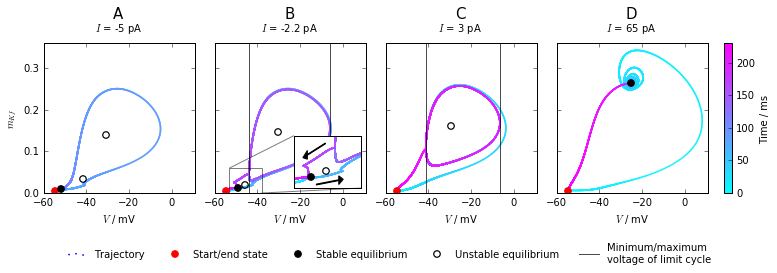

In [20]:
plt.rc('figure', figsize=(11, 4))

#plt.plot(v[0], mkf[0], 'ob')

# from bifurcation diagram at I=-2.20 pA
#plt.axvline(-49.2, c='black', alpha=0.5)  # stable equilibrium
#plt.axvline(-45.9, c='black', alpha=0.5)  # instable equilibrium
#plt.axvline(-43.8, c='black', alpha=0.5)  # Vmin of the limit cycle
#plt.axvline(-6.0, c='black', alpha=0.5)  # Vmax of the limit cycle

minfKf = lambda V: 1/(1+np.exp((V+17.55)/(-7.27)))

def plot_stable_equilibrium(v):
    return plt.plot(v, minfKf(v), 'o', markerfacecolor='black', markeredgecolor='black', markeredgewidth=1.2, markersize=6.5,)
    
def plot_instable_equilibrium(v):
    return plt.plot(v, minfKf(v), 'o', markerfacecolor='none', markeredgecolor='black', markeredgewidth=1.2, markersize=6.5,)
    
def plot_limit_cycle_border(v):
    return plt.axvline(v, c='black', alpha=0.7)
    

lines = []

for i in range(num_plots):
    ax = plt.subplot2grid((1, num_plots), (0, i))
    line = plt.scatter(V[i][start_ind:end_ind], MKF[i][start_ind:end_ind], c=np.arange(end_ind-start_ind), cmap='cool', s=3, edgecolor='')
    if i == 0: lines.append(line)
    plt.xlim(-60, 11)
    plt.xlabel('$V$ / mV')
    plt.ylim(0, 0.36)
    
    plt.locator_params(nbins=5)
    
    plt.text(-25, 0.42, letters[i], fontsize=15, horizontalalignment='center')
    plt.text(-25, 0.39, '$I$ = ' + currents[i], horizontalalignment='center')
    
    # start/end state
    line = plt.plot(-54.6, minfKf(-54.6), 'o', markerfacecolor='red', markeredgecolor='red', markeredgewidth=1.2, markersize=6.5)
    if i == 0: lines += line
    
    # values from bifurcation diagram
    if i == 0:
        lines += plot_stable_equilibrium(-51.9)
        lines += plot_instable_equilibrium(-41.7)
        plot_instable_equilibrium(-30.8)
    elif i == 1:
        plot_stable_equilibrium(-49.2)
        plot_instable_equilibrium(-45.9)
        plot_instable_equilibrium(-30.3)
        line = plot_limit_cycle_border(-43.8)
        lines.append(line)
        plot_limit_cycle_border(-6.0)
    elif i == 2:
        plot_limit_cycle_border(-41.1)
        plot_limit_cycle_border(-6.5)
        plot_instable_equilibrium(-29.6)
        
        # 0 pA
        #plot_limit_cycle_border(-42.4)
        #plot_limit_cycle_border(-5.7)
        #plot_instable_equilibrium(-30.0)
        
        # 30 pA
        #plot_limit_cycle_border(-37.0)
        #plot_limit_cycle_border(-12.5)
        #plot_instable_equilibrium(-28.0)
    elif i == 3:
        plot_stable_equilibrium(-25.0)
           
    if i == 0:        
        plt.ylabel('$m_{Kf}$')
    else:
        plt.tick_params(labelleft='off')  # left='off', top='off', right='off'
        
    if i == 1:
        # make inset
        axins = zoomed_inset_axes(ax, 2.1, loc=4)
        plt.scatter(V[i][start_ind:end_ind], MKF[i][start_ind:end_ind], c=np.arange(end_ind-start_ind), cmap='cool', s=3, edgecolor='')
        plot_stable_equilibrium(-49.2)
        plot_instable_equilibrium(-45.9)
        plot_instable_equilibrium(-30.3)
        
        plt.arrow(-48, 0.004, 5, 0.005, head_width=0.01, head_length=1, fc='k', ec='k')
        plt.arrow(-46, 0.051, -4, -0.013, head_width=0.01, head_length=1, fc='k', ec='k')
        
        plt.xlim(-53, -38)
        plt.ylim(0, 0.06)
        plt.xticks([])
        plt.yticks([])
        mark_inset(ax, axins, loc1=2, loc2=4, fc="none", alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(right=0.90, top=0.79, bottom=0.27)

ax_colorbar = plt.gcf().add_axes([0.92, 0.27, 0.01, 0.52])
cb1 = matplotlib.colorbar.ColorbarBase(ax_colorbar, cmap='cool',
                                norm=matplotlib.colors.Normalize(vmin=start, vmax=end),
                                ticks=[0, 50, 100, 150, 200])
plt.ylabel('Time / ms')


plt.figlegend(lines, ['Trajectory', 'Start/end state', 'Stable equilibrium', 'Unstable equilibrium', 'Minimum/maximum\nvoltage of limit cycle'], 
              loc='lower center', ncol=5, numpoints=1, frameon=False)


plt.savefig('phase_space.png', dpi=300)

(-0.02, 0.08)

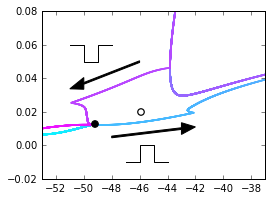

In [10]:
plt.rc('figure', figsize=(4, 3))

i = 1
plt.scatter(V[i][start_ind:end_ind], MKF[i][start_ind:end_ind], c=np.arange(end_ind-start_ind), cmap='cool', s=3, edgecolor='')
plot_stable_equilibrium(-49.2)
plot_instable_equilibrium(-45.9)
plot_instable_equilibrium(-30.3)

plt.arrow(-48, 0.005, 5, 0.005, head_width=0.007, head_length=1, fc='k', ec='k')
plt.arrow(-46, 0.05, -4, -0.013, head_width=0.007, head_length=1, fc='k', ec='k')

width = 3
height = 0.01
left = -47
bottom = -0.01
plt.plot([left, left+1./3.*width, left+1./3.*width, left+2./3.*width, left+2./3.*width, left+width], [bottom, bottom, bottom+height, bottom+height, bottom, bottom], 'k-')

left = -51
bottom = 0.05
plt.plot([left, left+1./3.*width, left+1./3.*width, left+2./3.*width, left+2./3.*width, left+width], [bottom+height, bottom+height, bottom, bottom, bottom+height, bottom+height], 'k-')


plt.xlim(-53, -37)
plt.ylim(-0.02, 0.08)